In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df_train = pd.read_csv('santander-customer-satisfaction (1)\\train.csv')
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


<Axes: xlabel='TARGET', ylabel='count'>

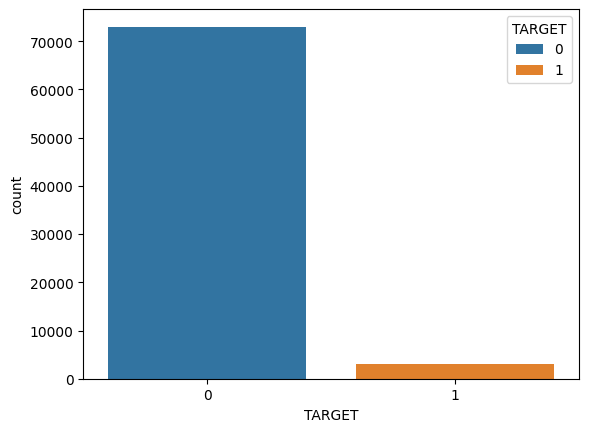

In [49]:
sns.countplot(x=df_train['TARGET'], data=df_train, hue=df_train['TARGET'])
# so this imbalance data. we need to balance it by using smote.

## Our data set is df_train(train)

In [50]:
# our data is df_train
x = df_train.drop('TARGET', axis='columns')
y = df_train['TARGET']
x.shape

(76020, 370)

In [51]:
y.shape

(76020,)

## Balance the data by using SMOTE

In [52]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

In [53]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scl = ss.fit_transform(x)

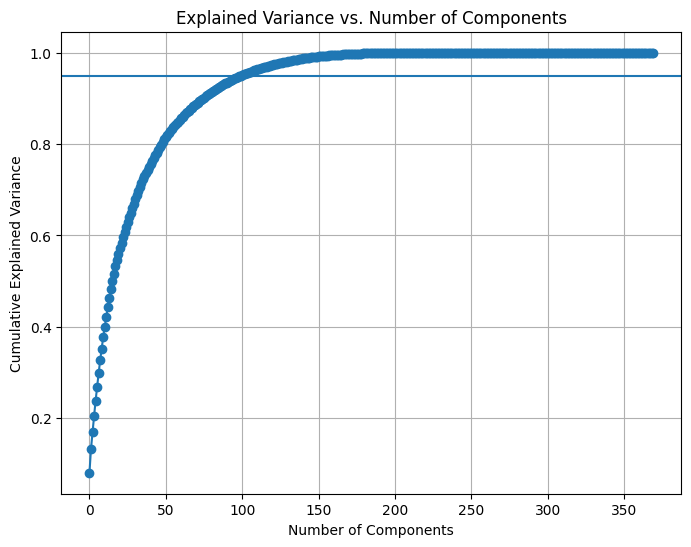

In [54]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA()
pca.fit(x_scl)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.95)
plt.grid(True)
plt.show()

##  PCA(reduce the dimensionality)

In [55]:
# if anyone asking about how to get 160, then you can run above code 
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
# pca = PCA(0.95)
x_pca = pca.fit_transform(x_sm)
x_pca.shape
# o.90 which returns the 90% usefull features and pca is convert values into scaler

(146024, 100)

## StandardScaler

In [56]:
# scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scl = ss.fit_transform(x_pca)

## Split the dataset

In [57]:
# so our finally data is x_scl and y_sm.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scl, y_sm, test_size=0.2, random_state=30)

## LogisticRegression

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [60]:
from sklearn.metrics import accuracy_score
lr.score(x_test, y_test)
lr.score(x_train, y_train)
y_test_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6566341379900702


## DecisionTreeClassifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc.score(x_test, y_test)

0.9062489299777435

In [68]:
from sklearn.metrics import accuracy_score
dtc.score(x_test, y_test)
dtc.score(x_train, y_train)
y_test_pred = dtc.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5376476630713919


## RandomForestClassifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.958602978941962

In [84]:
from sklearn.metrics import accuracy_score
rfc.score(x_test, y_test)
rfc.score(x_train, y_train)
y_test_pred = rfc.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.958602978941962


In [85]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     14607
           1       0.95      0.97      0.96     14598

    accuracy                           0.96     29205
   macro avg       0.96      0.96      0.96     29205
weighted avg       0.96      0.96      0.96     29205



## XGBoost

In [86]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
xgbc = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgbc.fit(x_train, y_train)
# Make predictions on the test set
y_test_pred = xgbc.predict(x_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9100838897449067


In [87]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     14607
           1       0.89      0.93      0.91     14598

    accuracy                           0.91     29205
   macro avg       0.91      0.91      0.91     29205
weighted avg       0.91      0.91      0.91     29205



In [69]:
# we can RandomForestClassifier model it gives best accuracy.
y_test_predict = rfc.predict(x_test)
y_test_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

## ROC

In [70]:
# roc on testing data
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test, y_test_predict)
roc

0.9586061933213278

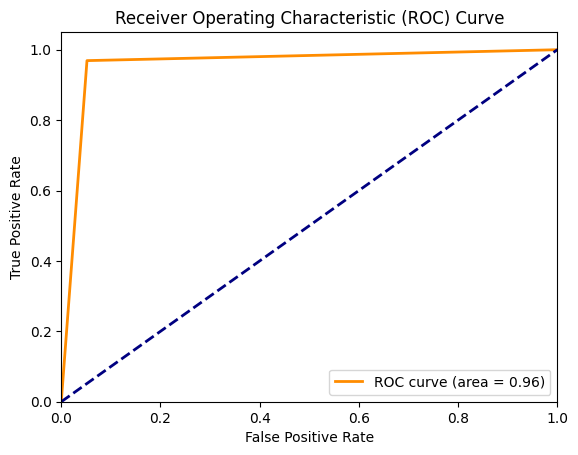

In [71]:
#roc curve on test_data
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## confusion_matrix

<Axes: >

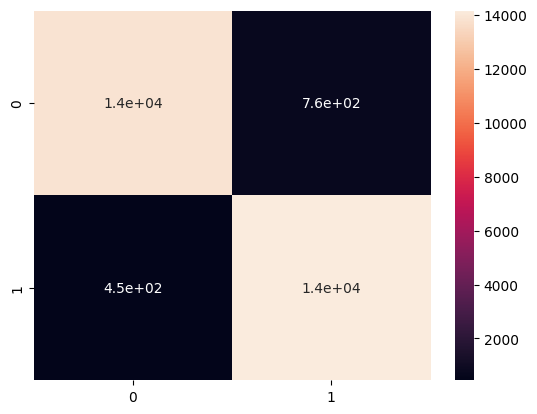

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm, annot=True)

## df_test

In [73]:
import pandas as pd
df_test = pd.read_csv(r'C:\Users\KU_0373\Downloads\santander-customer-satisfaction (1)\test.csv')
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [74]:
# after we use of test_df
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
# pca = PCA(0.95)
x_test_pca = pca.fit_transform(df_test)
x_pca.shape
# o.90 which returns the 90% usefull features and pca is convert values into scaler

(146024, 100)

In [75]:
# scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_test_scl = ss.fit_transform(x_test_pca)

In [76]:
x_test_scl
# Now our data is ready

array([[-7.07824612e-02, -3.28502221e-02, -2.10881002e-02, ...,
        -1.48041305e-02, -3.30800336e-02,  7.76218330e-03],
       [-7.07824611e-02, -3.28502221e-02, -2.10881002e-02, ...,
        -1.38980276e-02, -3.08718693e-02,  8.37632067e-03],
       [-7.07824611e-02, -3.28502221e-02, -2.10881002e-02, ...,
        -1.28798383e-02, -2.88838180e-02,  1.42616110e-02],
       ...,
       [-7.07824611e-02, -3.28502217e-02, -2.10880998e-02, ...,
         1.00995441e-02,  1.39664774e-02, -3.03018971e-03],
       [-7.07824611e-02, -3.28502219e-02, -2.10881002e-02, ...,
        -5.55823810e-04, -1.34246720e-02,  1.97189510e-03],
       [-7.07824611e-02, -3.28502219e-02, -2.10881002e-02, ...,
         7.97004244e-06, -1.56339779e-02,  5.01324959e-03]])

In [77]:
x_test_predict = rfc.predict(x_test_scl)

In [78]:
count_0 = 0
count_1 = 0
for i in x_test_predict:
    if i == 1:
        count_1 += 1
    else:
        count_0 += 1
print(f'count_1 is {count_1}')
print(f'count_0 is {count_0}')

count_1 is 1699
count_0 is 74119


In [79]:
import pandas as pd
# Create DataFrame
df_final_sub = pd.DataFrame({'ID': df_test['ID'], 'Target': x_test_predict})

# Show the DataFrame
df_final_sub.head()

,ID,Target
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0


In [80]:
df_final_sub.to_csv('df_final_val.csv', index=False)